# Ensemble and XAI
## CDC Diabetes Health Indicators Dataset

## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Datasets/diabetes
!ls

/content/drive/MyDrive/Datasets/diabetes
diabetes.csv


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score

## Loading Dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Education', ylabel='Count'>

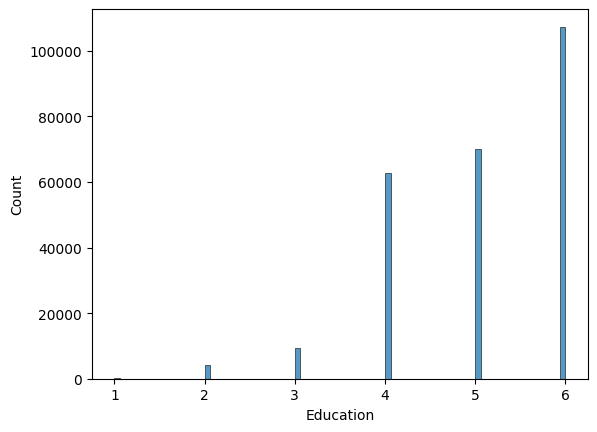

In [ ]:
sns.histplot(df['Education'])

<Axes: xlabel='Income', ylabel='Count'>

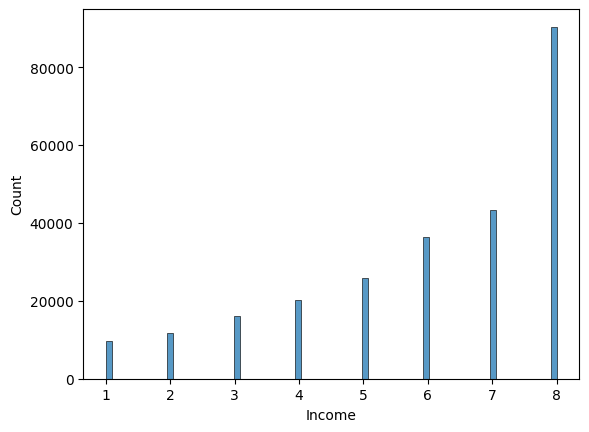

In [ ]:
sns.histplot(df['Income'])

<Axes: xlabel='Veggies', ylabel='Count'>

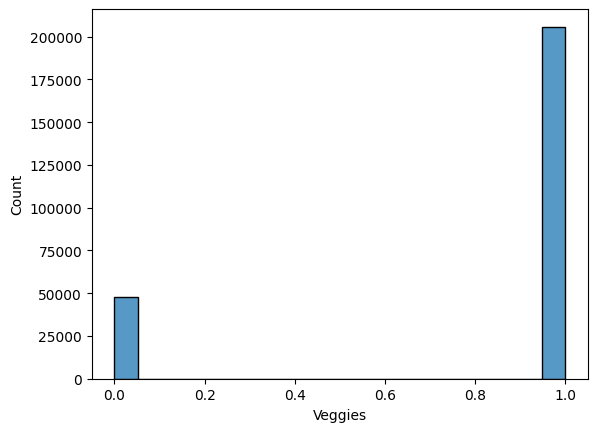

In [ ]:
sns.histplot(df['Veggies'])

<Axes: xlabel='AnyHealthcare', ylabel='Count'>

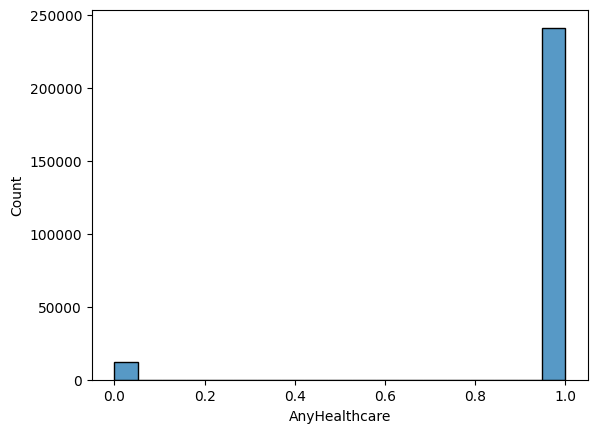

In [ ]:
sns.histplot(df['AnyHealthcare'])

## Data preprocessing and spliting

In [ ]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X[numerical_features])
scaled_df = pd.DataFrame(scaled_df, columns=numerical_features)

In [ ]:
data_X = scaled_df.copy()

In [ ]:
X = data_X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Bagging Approach: Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.8597248502049827


## Boosting Approach: Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Accuracy: 0.8675102491327656


## Stacking Approach

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5) #cv = cross validation
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

Stacking Model Accuracy: 0.8675890886155787


## Voting Classifier

In [ ]:
vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        #('svc', SVC(probability=True))
        ('lr', LogisticRegression(solver = 'newton-cholesky'))
    ],
    voting='soft'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))

Voting Classifier Accuracy: 0.8684563229265216


## Defining the models in the list

In [ ]:
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Stacking": stacking_model,
    "Voting": vote_model
}

## Evaluation

In [ ]:
for models, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{models} Accuracy: {accuracy_score(y_test, y_pred)}")

Random Forest Accuracy: 0.8597248502049827
Gradient Boosting Accuracy: 0.8675102491327656
Stacking Accuracy: 0.8675890886155787
Voting Accuracy: 0.8684563229265216


## Cross-Validation Performance Comparison

In [ ]:
from sklearn.model_selection import cross_val_score

# Define models
models2 = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('xgb', XGBClassifier(n_estimators=100, random_state=42))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": vote_model
}

# Perform cross-validation and store results
results = {}
for model_name, model in models2.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.8592 ± 0.0009
Gradient Boosting Cross-Validation Accuracy: 0.8664 ± 0.0006
Stacking Cross-Validation Accuracy: 0.8658 ± 0.0007
Voting Cross-Validation Accuracy: 0.8658 ± 0.0009


## Visualizing Cross-Validation Result

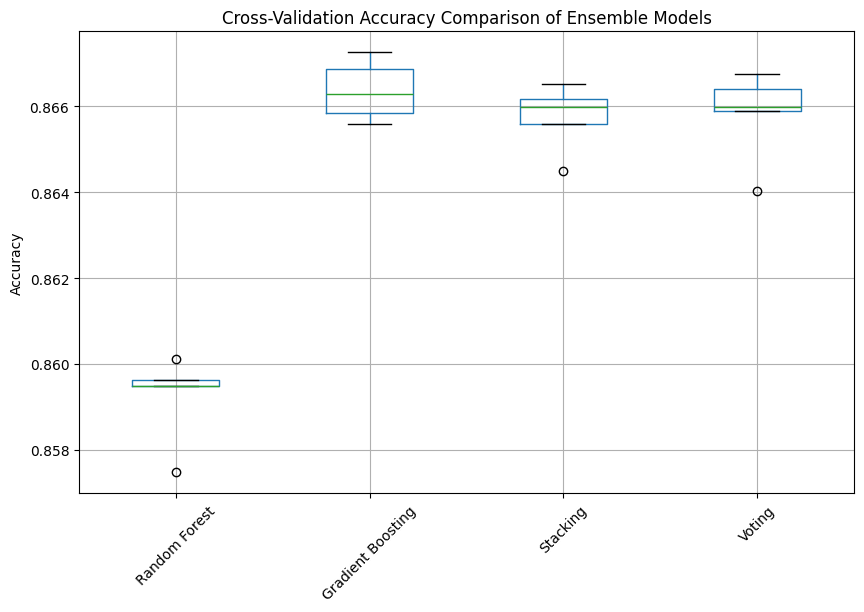

In [ ]:
import matplotlib.pyplot as plt

# Prepare results for visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

## Confusion Matrix for Each Model

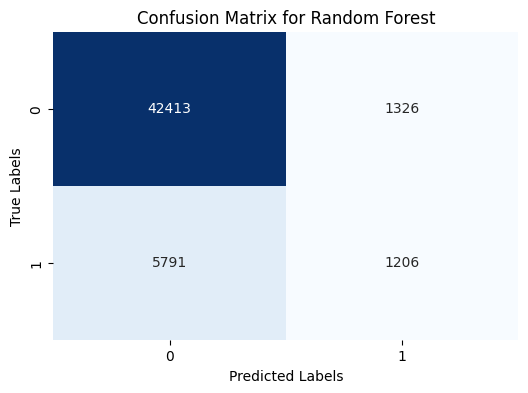

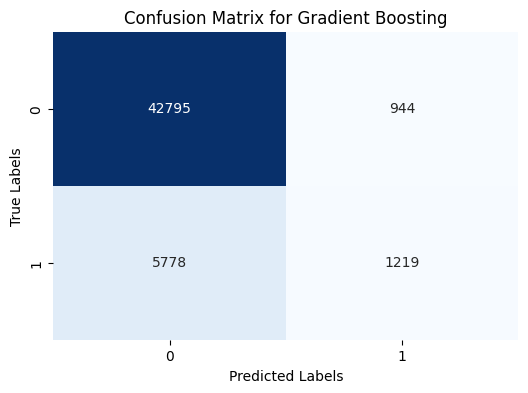

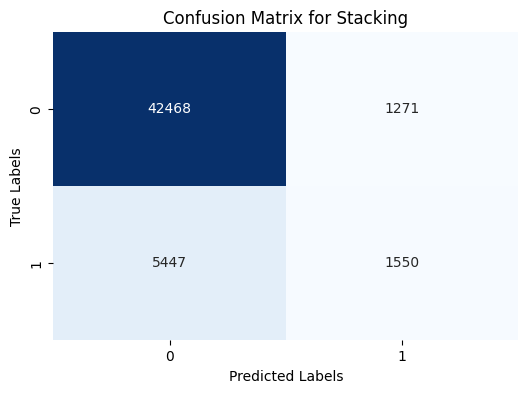

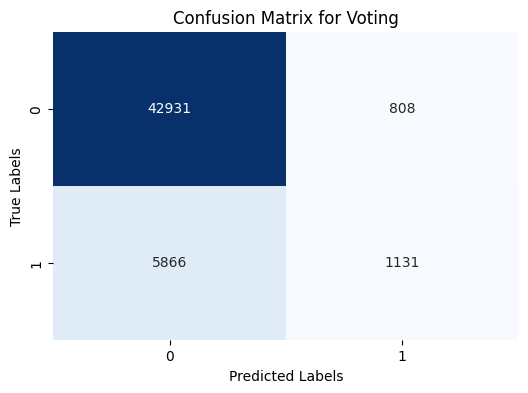

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # Fit the predict on test set
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

## Precision and Recall for Each Model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the predict on test set
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")

Random Forest Performance Metrics:
 - Precision: 0.8242
 - Recall: 0.8597
 - F1 Score: 0.8303

Gradient Boosting Performance Metrics:
 - Precision: 0.8373
 - Recall: 0.8675
 - F1 Score: 0.8360

Stacking Performance Metrics:
 - Precision: 0.8399
 - Recall: 0.8676
 - F1 Score: 0.8424

Voting Performance Metrics:
 - Precision: 0.8389
 - Recall: 0.8685
 - F1 Score: 0.8348



## Summary Of Metrics

In [ ]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

Model Performance Summary:


Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.859725   0.824210  0.859725  0.830267
1  Gradient Boosting  0.867510   0.837262  0.867510  0.836020
2           Stacking  0.867589   0.839862  0.867589  0.842446
3             Voting  0.868456   0.838898  0.868456  0.834823

## Explainable AI (XAI) with SHAP

### Random Forest

In [ ]:
import shap

# Use a subset of the data for SHAP to reduce computation time
X_sample = X_test.sample(100, random_state=42)

# Initialize SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(models["Random Forest"])
shap_values = explainer.shap_values(X_sample)

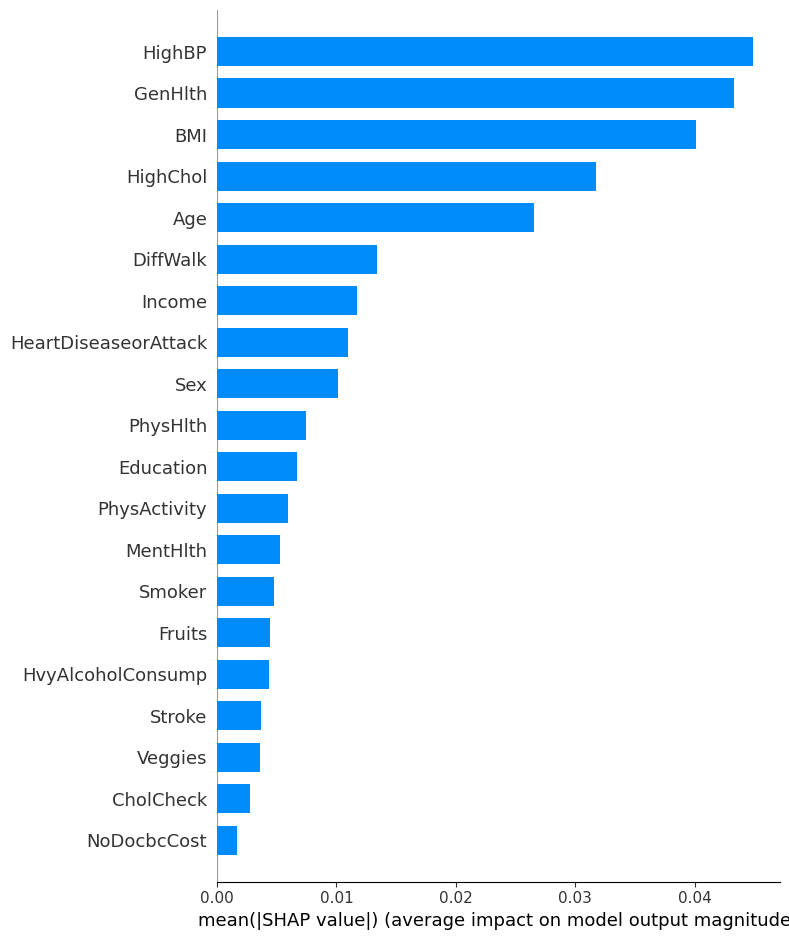

In [ ]:
import numpy as np

# Calculate mean absolute SHAP values across all classes for each feature
mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )
mean_shap_values = np.mean(mean_shap_values, axis=1)

# Repeat this vector to create a matrix that matches X_sample's shape
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))

# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)


### Gradient Boosting

In [ ]:
# Use a subset of the data for SHAP to reduce computation time
X_sample_gb = X_test.sample(100, random_state=42)

# Initialize SHAP explainer for the Gradient Boosting model
explainer_gb = shap.TreeExplainer(models["Gradient Boosting"])
shap_values_gb = explainer_gb.shap_values(X_sample_gb)

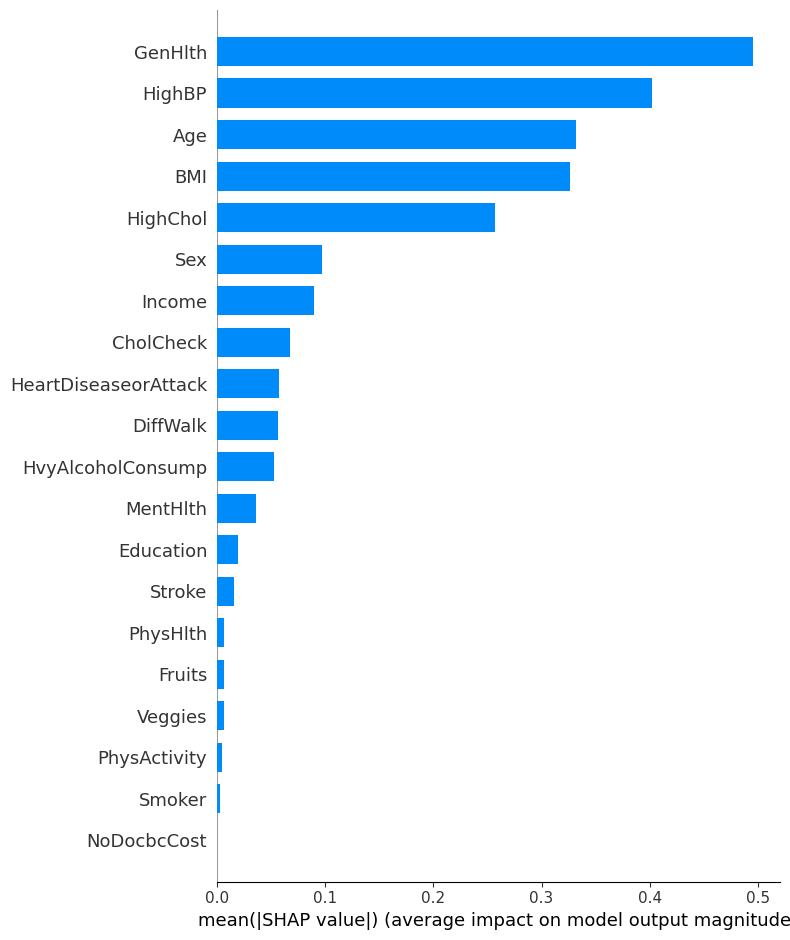

In [ ]:
# Calculate mean absolute SHAP values across all classes for each feature
mean_shap_values_gb = np.mean([np.abs(sv) for sv in shap_values_gb], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )
#mean_shap_values_gb = np.mean(mean_shap_values_gb, axis=1)

# Repeat this vector to create a matrix that matches X_sample's shape
mean_shap_values_repeated_gb = np.tile(mean_shap_values_gb, (X_sample_gb.shape[0], 1))

# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated_gb, X_sample_gb, plot_type="bar", feature_names=X_sample_gb.columns)

## Explainable AI (XAI) with Lime

In [ ]:
!pip install lime -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### Random Forest

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Ensure class names are provided as a list of labels
lime_explainer = LimeTabularExplainer(
    X_train.values,  # Training data
    feature_names=X.columns,  # Feature names
    class_names=['Not Diabetic', 'Diabetic'],  # Class names
    mode='classification'  # Classification mode
)

# Choose a sample from the test set to explain
sample_index = 10  # Adjust to analyze a different sample
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],  # Use pandas .iloc for correct indexing
    models["Random Forest"].predict_proba,  # Model's probability prediction
    num_features=10  # Number of features to explain
)

# Display the explanation in the notebook
exp.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Gradient Boosting

In [ ]:
lime_explainer = LimeTabularExplainer(
    X_train.values,  # Training data
    feature_names=X.columns,  # Feature names
    class_names=['Not Diabetic', 'Diabetic'],  # Class names
    mode='classification'  # Classification mode
)

# Choose a sample from the test set to explain
sample_index = 10  # Adjust to analyze a different sample
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],  # Use pandas .iloc for correct indexing
    models["Gradient Boosting"].predict_proba,  # Model's probability prediction
    num_features=10  # Number of features to explain
)

# Display the explanation in the notebook
exp.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
